## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading the data

In [2]:
df = pd.read_csv('data/preprocessed_data.csv')

## Visualizations of the dataset

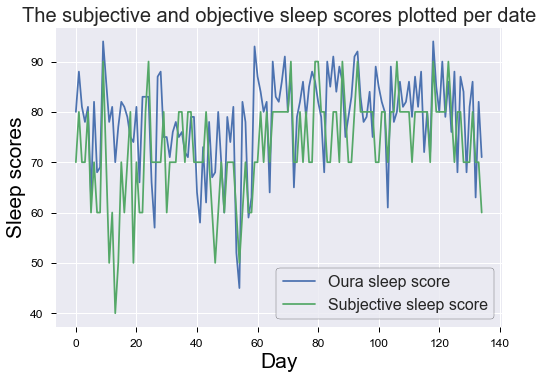

In [3]:
# Plot the subjective sleep scores (from the questionnaires) and the objective sleep scores (from the Oura ring measurements) together per date
def plot_sleep_scores(df):
    plt.style.use("seaborn")
    colour_axes = "black"

    sleep_scores = plt.figure()
    ax_sleep_scores = sleep_scores.add_subplot(111)
    ax_sleep_scores.plot(df['score'].values, label="Oura sleep score")
    ax_sleep_scores.plot(df['subjective_sleep_score'].values, label="Subjective sleep score")
    ax_sleep_scores.set_xlabel("Day", fontsize=21)
    ax_sleep_scores.set_ylabel("Sleep scores", fontsize=21)
    ax_sleep_scores.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_sleep_scores.set_title("The subjective and objective sleep scores plotted per date", fontsize=20)
    ax_sleep_scores.yaxis.label.set_color(colour_axes)
    ax_sleep_scores.xaxis.label.set_color(colour_axes)
    ax_sleep_scores.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')

    plt.show()

plot_sleep_scores(df)

<AxesSubplot:>

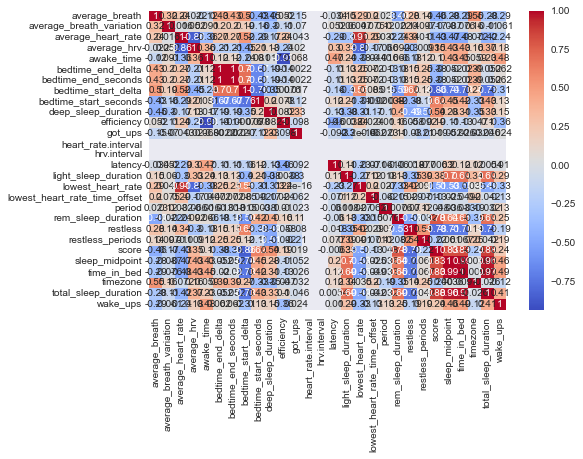

In [4]:
heatmap_data = df.iloc[:, 0:48]
heatmap_data = heatmap_data.drop(labels=['contributors.deep_sleep', 'contributors.efficiency', 'contributors.latency', 'contributors.rem_sleep', 'contributors.restfulness', 'contributors.timing', 'contributors.total_sleep', 'readiness.contributors.activity_balance', 'readiness.contributors.body_temperature', 'readiness.contributors.hrv_balance', 'readiness.contributors.previous_day_activity', 'readiness.contributors.previous_night', 'readiness.contributors.recovery_index', 'readiness.contributors.resting_heart_rate', 'readiness.contributors.sleep_balance', 'readiness.score', 'readiness.temperature_deviation', 'readiness.temperature_trend_deviation'], axis=1)
sns.heatmap(heatmap_data.corr(), cmap='coolwarm', annot=True)

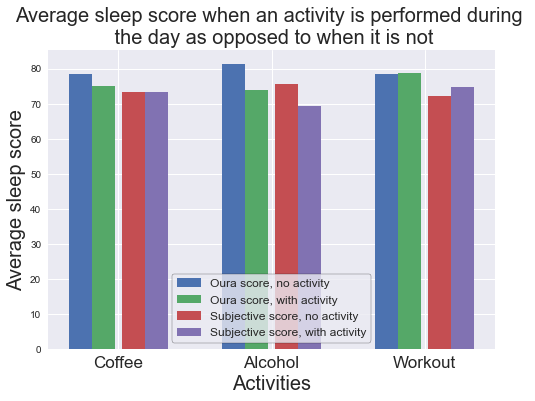

In [5]:
def average(lst):
    return sum(lst) / len(lst)

def plot_activities_effect(df):

    # X = ['Coffee', 'Alcohol', 'Workout', 'Stress relieving activity']
    X = ['Coffee', 'Alcohol', 'Workout']

    average_no_coffee = average(df[pd.isna(df['coffee_time'])].score)
    average_coffee = average(df[~(pd.isna(df['coffee_time']))].score)

    average_no_alcohol = average(df[pd.isna(df['alcohol_time'])].score)
    average_alcohol = average(df[~(pd.isna(df['alcohol_time']))].score)

    average_no_workout = average(df[pd.isna(df['workout_time'])].score)
    average_workout = average(df[~(pd.isna(df['workout_time']))].score)

    # average_no_stress_relief = average(df[pd.isna(df['stress_relief_time'])].score)
    # average_stress_relief = average(df[~(pd.isna(df['stress_relief_time']))].score)

    # y_absent = [average_no_coffee, average_no_alcohol, average_no_workout, average_no_stress_relief]
    # y_present = [average_coffee, average_alcohol, average_workout, average_stress_relief]

    y_absent = [average_no_coffee, average_no_alcohol, average_no_workout]
    y_present = [average_coffee, average_alcohol, average_workout]

    sub_average_no_coffee = average(df[pd.isna(df['coffee_time'])].subjective_sleep_score)
    sub_average_coffee = average(df[~(pd.isna(df['coffee_time']))].subjective_sleep_score)

    sub_average_no_alcohol = average(df[pd.isna(df['alcohol_time'])].subjective_sleep_score)
    sub_average_alcohol = average(df[~(pd.isna(df['alcohol_time']))].subjective_sleep_score)

    sub_average_no_workout = average(df[pd.isna(df['workout_time'])].subjective_sleep_score)
    sub_average_workout = average(df[~(pd.isna(df['workout_time']))].subjective_sleep_score)

    y_absent_sub = [sub_average_no_coffee, sub_average_no_alcohol, sub_average_no_workout]
    y_present_sub = [sub_average_coffee, sub_average_alcohol, sub_average_workout]

    X_axis = np.arange(len(X))
  
    plt.bar(X_axis - 0.25, y_absent, 0.15, label = 'Oura score, no activity')
    plt.bar(X_axis - 0.10, y_present, 0.15, label = 'Oura score, with activity')
    plt.bar(X_axis + 0.10, y_absent_sub, 0.15, label = 'Subjective score, no activity')
    plt.bar(X_axis + 0.25, y_present_sub, 0.15, label = 'Subjective score, with activity')
    
    plt.xticks(X_axis, X, fontsize=17)
    plt.xlabel("Activities", fontsize=20)
    plt.ylabel("Average sleep score", fontsize=20)
    plt.title("Average sleep score when an activity is performed during \n the day as opposed to when it is not", fontsize=20)
    plt.legend(prop={'size': 12}, frameon=True, loc="best").get_frame().set_edgecolor('k')
    plt.show()

plot_activities_effect(df)

In [6]:

print(average(df[pd.isna(df['coffee_time'])].score))
print(df[~(pd.isna(df['coffee_time']))].score)
print(average(df[~(pd.isna(df['coffee_time']))].score))

78.59848484848484
3      78.0
111    79.0
126    68.0
Name: score, dtype: float64
75.0
